# Sentimental analysis & Time series

In [1]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import re 
import string 
from string import punctuation 
import nltk 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.callbacks import EarlyStopping
from nltk.sentiment import SentimentIntensityAnalyzer
import praw
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk


C:\Users\lenovo\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:

# Read the CSV file
df = pd.read_csv('ProjectTweets.csv')

# Display the first few rows of the DataFrame
df.head(10)


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,6,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,7,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,8,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,10,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [7]:
# infoof the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [8]:
# Name of the columns
print(df.columns)


Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')


In [9]:

#  Ignore the headers of the DataFrame
df = pd.read_csv('ProjectTweets.csv', header=None)

#  My column names
df_columns = ['Id', 'Code', 'Date', 'No_Query','User','Comments']  

# column names to the DataFrame
df.columns = df_columns

df.head()


,Id,Code,Date,No_Query,User,Comments
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
# Drop irrelevant columns
df = df.drop(['Id', 'No_Query', ], axis=1)

df.dropna(inplace=True)

df.head()

,Code,Date,User,Comments
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


# Data Pre Processing

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Remove punctuation
punct = string.punctuation

# Normaliza words
stemmer = PorterStemmer()

In [14]:
print(df.columns)


Index(['Code', 'Date', 'User', 'Comments'], dtype='object')


In [31]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:

# Define a function to preprocess text
def preprocess_text(text):
    # Remove special characters and lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return text

# preprocessing to the 'Comments' column
df['Comments'] = df['Comments'].apply(preprocess_text)

# Define a function to tokenize words
def tokenize_words(text):
    return word_tokenize(text)

# Apply word tokenization to the 'Comments' column
df['Comments'] = df['Comments'].apply(tokenize_words)
df.head()


,Code,Date,User,Comments,Sentiment,Negative,Neutral,Positive
0,1467810369,NaT,_TheSpecialOne_,"[switchfoot, httptwitpiccomyzl, awww, that, a,...",-0.3818,1,0,0
1,1467810672,NaT,scotthamilton,"[is, upset, that, he, cant, updat, hi, faceboo...",-0.4588,1,0,0
2,1467810917,NaT,mattycus,"[kenichan, i, dive, mani, time, for, the, ball...",0.4939,0,0,1
3,1467811184,NaT,ElleCTF,"[my, whole, bodi, feel, itchi, and, like, it, ...",0.0258,0,0,1
4,1467811193,NaT,Karoli,"[nationwideclass, no, it, not, behav, at, all,...",-0.6597,1,0,0


In [33]:
# stemming function
def normalize_words(text):
    stemmer = nltk.PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words

# Apply word stemming to the 'Comments' column
df['Comments'] = df['Comments'].apply(normalize_words)


In [35]:
# Join the tokenized and preprocessed words into a single string
df['Comments'] = df['Comments'].apply(lambda words: ' '.join(words))

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'Comments' column to create a document-term matrix
X = vectorizer.fit_transform(df['Comments'])


# Sentiment Analysis with NLTK:

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each comment
df['Sentiment'] = df['Comments'].apply(lambda x: sia.polarity_scores(x)['compound'])




In [37]:
# clean the column date
df['Date'] = pd.to_datetime(df['Date'], format='%a %b %d %H:%M:%S %Z %Y', errors='coerce')

# Extract only the date part
df['Date'] = df['Date'].dt.date



In [38]:
# Create a new column to add the sentiment
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative')

# rows to check  the new column
print(df[['Comments', 'Sentiment', 'Sentiment_Label']].head())


                                            Comments  Sentiment  \
0  switchfoot httptwitpiccomyzl awww that a bumme...    -0.3818   
1  is upset that he cant updat hi facebook by tex...    -0.4588   
2  kenichan i dive mani time for the ball manag t...     0.4939   
3       my whole bodi feel itchi and like it on fire     0.0258   
4  nationwideclass no it not behav at all im mad ...    -0.6597   

  Sentiment_Label  
0        Negative  
1        Negative  
2        Positive  
3        Positive  
4        Negative  


In [39]:
df.head()

,Code,Date,User,Comments,Sentiment,Negative,Neutral,Positive,Sentiment_Label
0,1467810369,NaT,_TheSpecialOne_,switchfoot httptwitpiccomyzl awww that a bumme...,-0.3818,1,0,0,Negative
1,1467810672,NaT,scotthamilton,is upset that he cant updat hi facebook by tex...,-0.4588,1,0,0,Negative
2,1467810917,NaT,mattycus,kenichan i dive mani time for the ball manag t...,0.4939,0,0,1,Positive
3,1467811184,NaT,ElleCTF,my whole bodi feel itchi and like it on fire,0.0258,0,0,1,Positive
4,1467811193,NaT,Karoli,nationwideclass no it not behav at all im mad ...,-0.6597,1,0,0,Negative


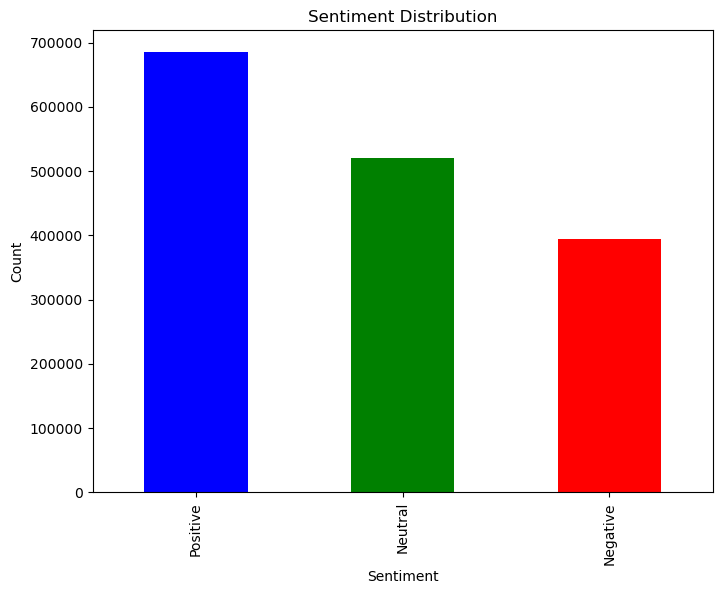

In [40]:
import matplotlib.pyplot as plt

# Count the number of comments in each sentiment category
sentiment_counts = df['Sentiment_Label'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')


plt.show()



In [26]:
one_hot = pd.get_dummies(df["Sentiment_Label"])
df.drop(['Sentiment_Label'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,Code,Date,User,Comments,Sentiment,Negative,Neutral,Positive
0,1467810369,NaT,_TheSpecialOne_,switchfoot httptwitpiccomyzl awww that a bumme...,-0.3818,1,0,0
1,1467810672,NaT,scotthamilton,is upset that he cant updat hi facebook by tex...,-0.4588,1,0,0
2,1467810917,NaT,mattycus,kenichan i dive mani time for the ball manag t...,0.4939,0,0,1
3,1467811184,NaT,ElleCTF,my whole bodi feel itchi and like it on fire,0.0258,0,0,1
4,1467811193,NaT,Karoli,nationwideclass no it not behav at all im mad ...,-0.6597,1,0,0


In [41]:
from sklearn.model_selection import train_test_split
X = df['Comments']
y = df[['Positive', 'Neutral', 'Negative']]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
#Create a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'Comments' column to create a document-term matrix
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [57]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

model = Sequential()

model.add(Dense(units=512, activation='relu'))  # 
model.add(Dropout(0.5))

model.add(Dense(units=128, activation='relu'))  # 
model.add(Dropout(0.5))

model.add(Dense(units=64, activation='relu'))   # Reduced from 500
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))


opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [ ]:
# Sort the indices of the sparse matrix
X_train.sort_indices()

# Train the model with the sorted sparse input
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])


Epoch 1/100
 146/5000 [..............................] - ETA: 11:16:30 - loss: 0.6257 - accuracy: 0.7374